<a href="https://colab.research.google.com/github/AngTorresv/Machine_Learning/blob/main/R/Kmeans_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = TRUE)
    sapply(pkg, require, character.only = TRUE)
}
packages<-c("tidyverse","cluster","factoextra","NbClust")
ipak(packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘pixmap’, ‘sp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’, ‘ade4’, ‘ca’, ‘igraph’, ‘mclust’


Warning message in install.packages(new.pkg, dependencies = TRUE):
“installation of package ‘igraph’ had non-zero exit status”
Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggp

tidyverse    cluster factoextra    NbClust 
      TRUE       TRUE       TRUE       TRUE

In [6]:
df<-USArrests
df


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [16]:
df<-scale(df)
df

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.78283935,-0.52090661,-0.003416473
Alaska,0.50786248,1.10682252,-1.21176419,2.484202941
Arizona,0.07163341,1.47880321,0.99898006,1.042878388
Arkansas,0.23234938,0.23086801,-1.07359268,-0.184916602
California,0.27826823,1.26281442,1.75892340,2.067820292
Colorado,0.02571456,0.39885929,0.86080854,1.864967207
Connecticut,-1.03041900,-0.72908214,0.79172279,-1.081740768
Delaware,-0.43347395,0.80683810,0.44629400,-0.579946294
Florida,1.74767144,1.97077766,0.99898006,1.138966691
Georgia,2.20685994,0.48285493,-0.38273510,0.487701523


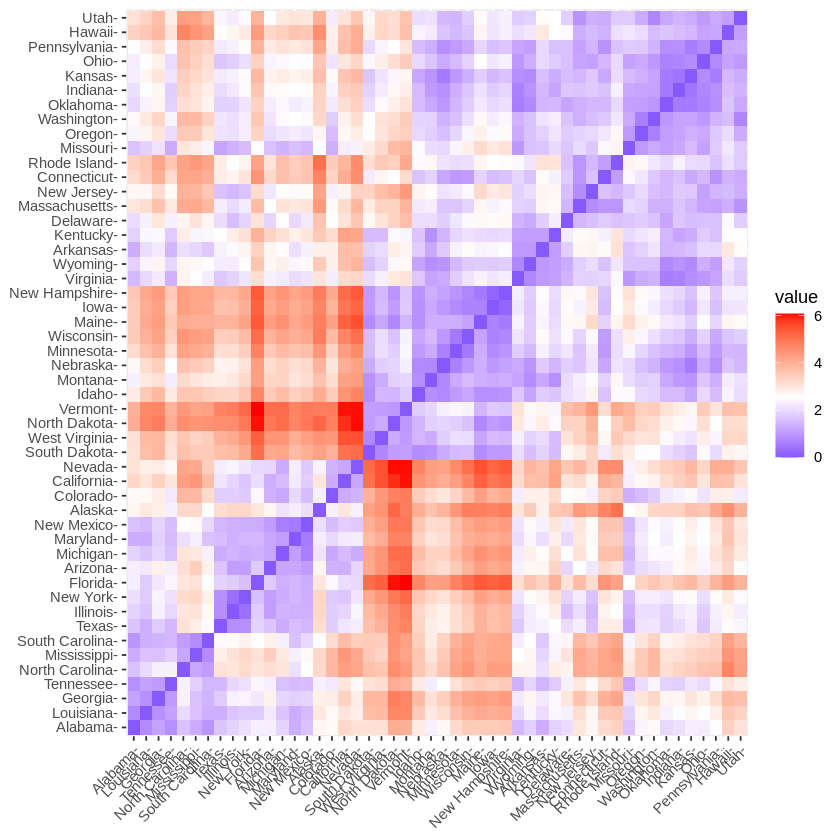

In [17]:
m.distancia<-get_dist(df,method = "euclidean")
fviz_dist(m.distancia,gradient = list(low="blue",mid="white",high="red"))

Como podemos ver se pueden apreciar conjuntos con sierto nivel de similitud lo cual puede significar que los datos son clusterisables 


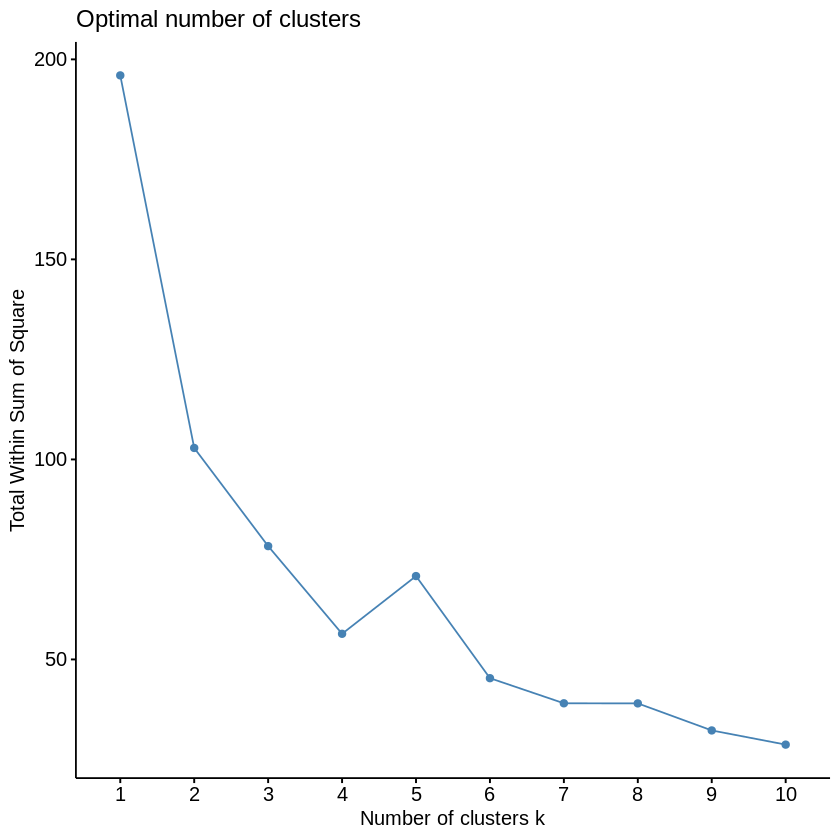

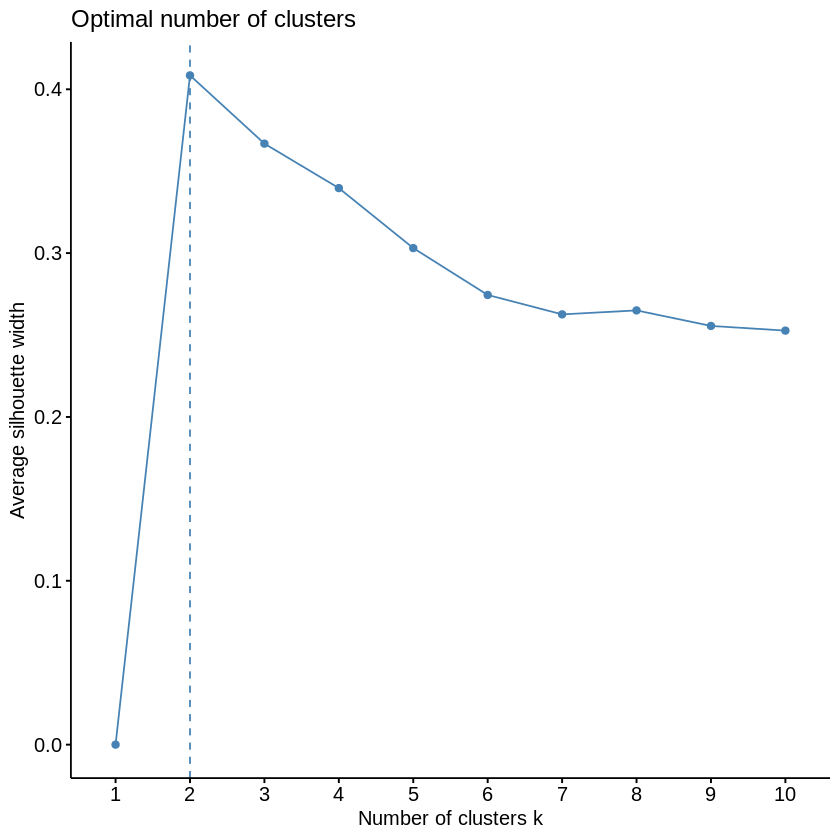

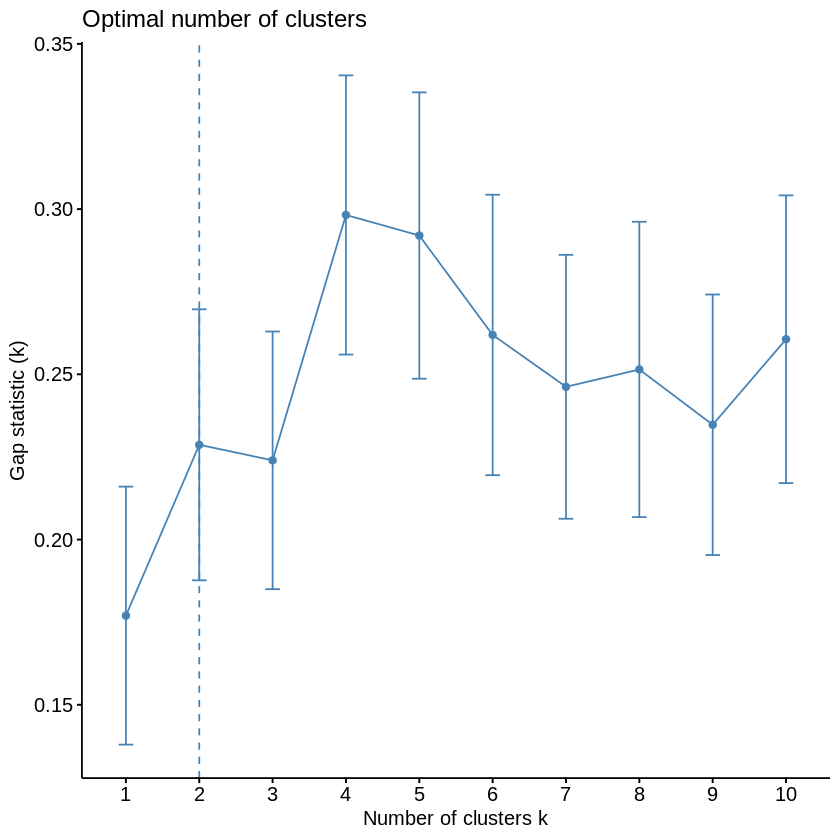

In [19]:
fviz_nbclust(df,kmeans ,method="wss")
fviz_nbclust(df,kmeans ,method="silhouette")
fviz_nbclust(df,kmeans ,method="gap_stat")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


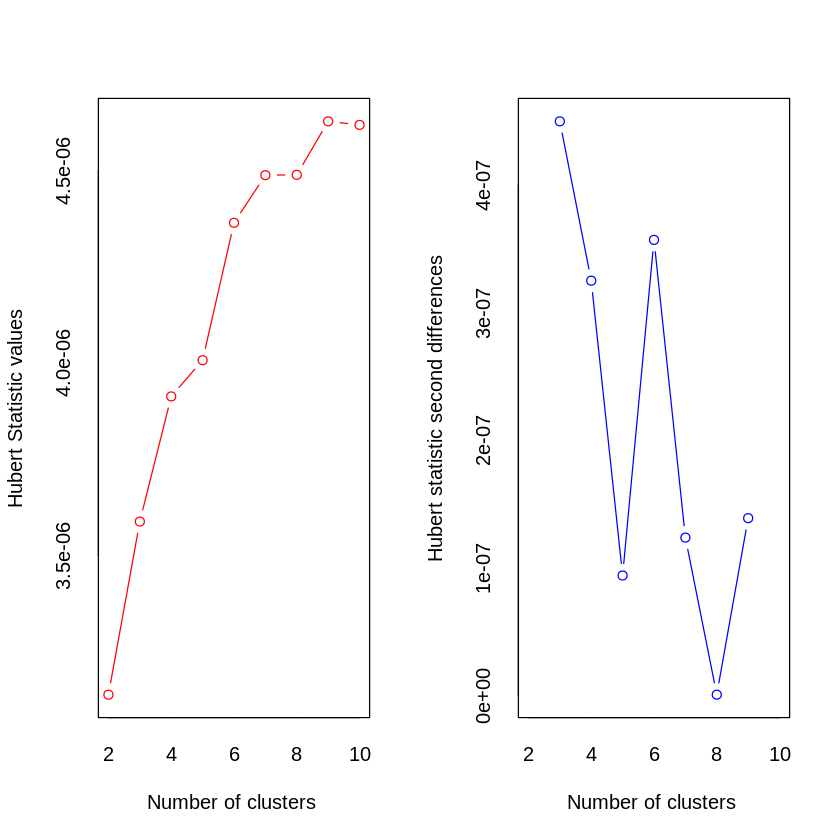

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number of clusters 
* 5 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


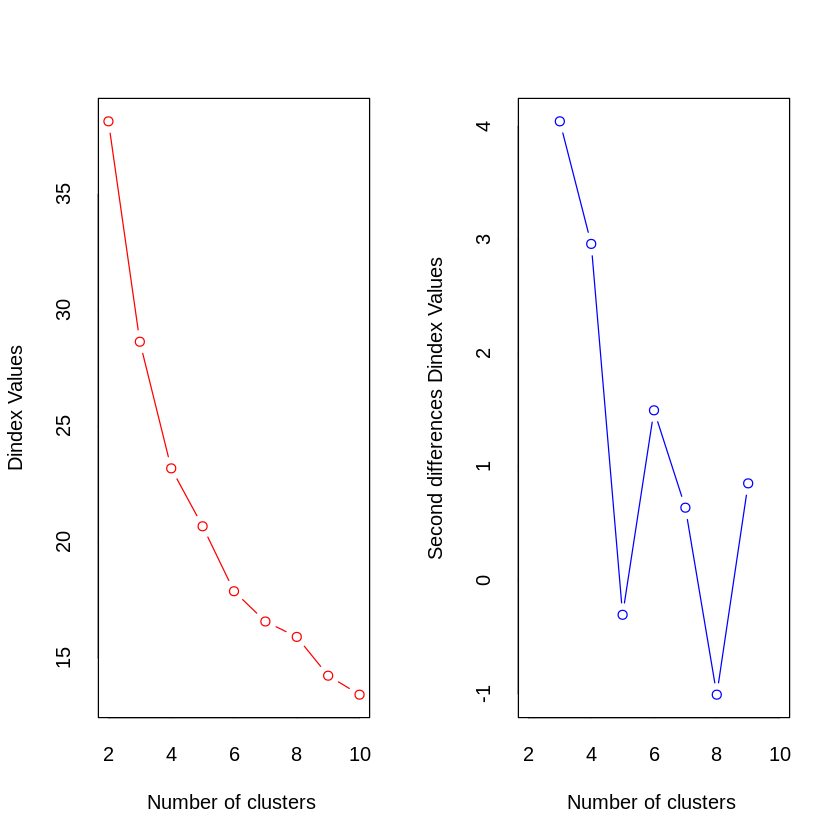

In [14]:
resnumclusters<-NbClust(df,distance ="euclidean",min.nc=2,max.nc = 10,method = "kmeans",index = "alllong" )

Estos metodos sugieren que deben existir 2 clusters

In [20]:
k2<-kmeans(df,centers = 2 ,nstart = 25)
k2

K-means clustering with 2 clusters of sizes 20, 30

Cluster means:
     Murder    Assault   UrbanPop       Rape
1  1.004934  1.0138274  0.1975853  0.8469650
2 -0.669956 -0.6758849 -0.1317235 -0.5646433

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana    

el grupo 1 es al parecer mas peligroso que el grupo 2 

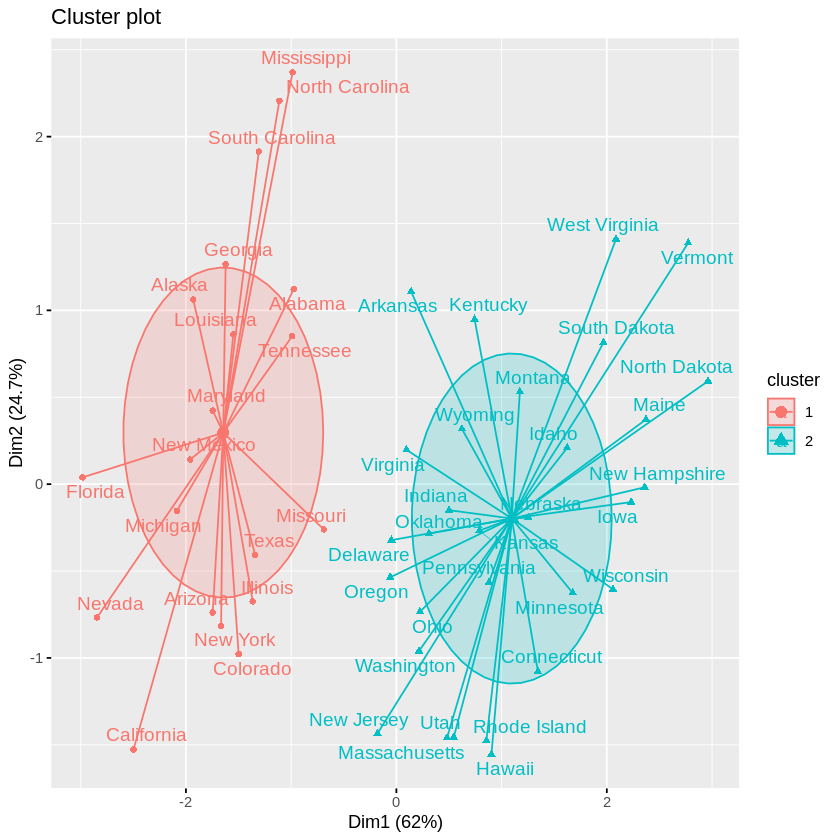

In [21]:
fviz_cluster(k2,data=df,ellipse.type = "euclid",repel = TRUE,star.plot=TRUE)

#creamos un nuevo dataframe escalado con la clasificacion de cada estado.

In [27]:
df<-USArrests
df$clus<-as.factor(k2$cluster)
df

,Murder,Assault,UrbanPop,Rape,clus
,<dbl>,<int>,<int>,<dbl>,<fct>
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Florida,15.4,335,80,31.9,1
